### Doing the MNIST example, but using Tensor Flow

In [18]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
import os
import matplotlib.image as mpimg
import numpy as np

In [19]:
print(tf.__version__)

1.13.1


In [20]:
mnist = keras.datasets.mnist

In [21]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

In [22]:
train_images.shape

(60000, 28, 28)

In [23]:
type(test_images)

numpy.ndarray

([], <a list of 0 Text yticklabel objects>)

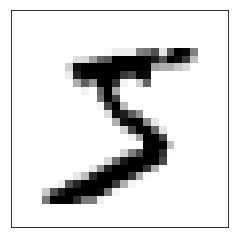

In [24]:
plt.figure()
plt.imshow(train_images[0], cmap = 'binary')
plt.xticks([])
plt.yticks([])

In [25]:
train_images[0].shape

(28, 28)

In [26]:
# Normalizing the data
test_images = test_images/255.0
train_images = train_images/255.0

In [27]:
test_images.shape

(10000, 28, 28)

In [28]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [29]:
# Compile the model
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [30]:
# Train the model
model.fit(train_images, train_labels, epochs = 30)

Epoch 1/30
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2635 - acc: 0.9247
Epoch 2/30
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1157 - acc: 0.9653
Epoch 3/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0797 - acc: 0.9764
Epoch 4/30
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0599 - acc: 0.9819
Epoch 5/30
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0461 - acc: 0.9856
Epoch 6/30
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0363 - acc: 0.9888
Epoch 7/30
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0286 - acc: 0.9912
Epoch 8/30
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0244 - acc: 0.9922
Epoch 9/30
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0188 - acc: 0.9943
Epoch 10/30
60000/60000 [==============================] - 5s 86us/sample - loss: 

In [31]:
# Evaluate network performance on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.1373 - acc: 0.9771


In [38]:
test_images.shape

(10000, 28, 28)

### Now to test my own images with the network



     Actual label (Predicted label)


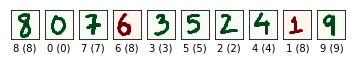

In [109]:
all_images = np.zeros((10, 28, 28))
actual_labels = [8, 0, 7, 6, 3, 5, 2, 4, 1, 9]

for i in range(n_examples):
    img = mpimg.imread(files[i])
    img = np.sum(img, axis=2)/3.
    img = 1-img # So that black pixels are 'hot', and the background is white.
    plt.subplot(1, n_examples, i+1)
    predicted_label = np.argmax(model.predict(img.reshape(1, 28, 28)))
    if(predicted_label == actual_labels[i]):
        plt.imshow(img, cmap = 'Greens')        
    else:
        plt.imshow(img, cmap = 'Reds')
    plt.xlabel(str(actual_labels[i]) + " ("+str(predicted_label)+")")
    plt.xticks([])
    plt.yticks([])
    
    
    predicted_labels += str(predicted_label) + " "
    #predicted_labels += str(np.argmax(net.feedforward(img.reshape(784, 1)))) + " "
    #print(model.predict(img))

print("\n\n     Actual label (Predicted label)")

### An example that shows how 'bad' scaling can affect the model prediction

7


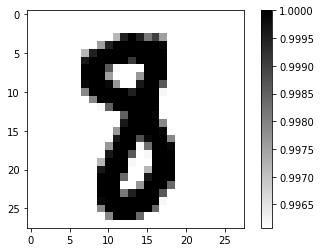

In [104]:
i = 0
img = mpimg.imread(files[i])
# img = np.sum(img, axis=2)/3. # The right scaling
img = (np.sum(img, axis=2)/3.)/255. # The wrong scaling
img = 1. - img
plt.imshow(img, cmap = 'binary')
plt.colorbar()
print(np.argmax(model.predict(img.reshape(1, 28, 28))))